# 🛍️ Amazon Product Categories Clustering

This notebook clusters Amazon product categories using sentence embeddings and KMeans. The goal is to group semantically similar categories and analyze patterns within them.

---

## 📦 Libraries Used

- `pandas` → for data loading and manipulation  
- `sentence_transformers` → to generate semantic embeddings for text  
- `sklearn.cluster.KMeans` → to perform unsupervised clustering  
- `sklearn.metrics.silhouette_score` → to evaluate cluster quality  
- `re`, `collections.Counter` → for text cleaning and word frequency analysis  
- `matplotlib.pyplot`, `numpy` → for data visualization

---

## 🧹 Data Preprocessing

- Loaded dataset:  
  `Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv`

- Focused on the `categories` column only.  
- Dropped missing values (`NaN`) from the category column.  
- Used `paraphrase-MiniLM-L6-v2` model to convert categories to sentence embeddings.  
- Applied `KMeans` clustering with `n_clusters=6`  
- Manually assigned meaningful labels to each cluster (e.g., "Electronics", "Tablets", etc.)  
- Mapped each original category to its cluster name.  
- Added a new column called `Cluster_Category` to the dataset.  
- Saved the updated dataset to `updated_categories_with_clusters.csv`.

---

## 💾 Output

The resulting dataset includes a new column: `Cluster_Category` with human-readable cluster names.

You can download the updated file from the provided link (if using Jupyter or Colab).


## Import required libraries

In [1]:
import pandas as pd
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import re
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

2025-04-11 16:49:40.133378: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Load and prepare dataset

In [24]:
# Load the CSV dataset and extract unique product categories
data = pd.read_csv('/Users/aleph/Desktop/untitled folder/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv')

corpus_categories = data['categories'].unique().tolist()  # Extract unique category strings
print(len(corpus_categories), 'unique categories')
print("-" * 50)

60 unique categories
--------------------------------------------------


## Load and apply sentence embeddings

In [25]:
# Load a pre-trained sentence transformer model to embed the text categories
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')  # Lightweight semantic embedding model
embeddings_categories = model.encode(corpus_categories, convert_to_tensor=True)  # Convert text to vectors

## Cluster using KMeans and evaluate

In [26]:
# Try clustering with different numbers of clusters and evaluate performance
k_values = [4, 5, 6]  # List of k values to try

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)  # Initialize KMeans
    kmeans.fit(embeddings_categories)  # Fit model to embeddings

    sil_score_kmeans = silhouette_score(embeddings_categories, kmeans.labels_)  # Evaluate clustering
    print(f"Silhouette Score for KMeans with {k} clusters: {sil_score_kmeans}")

    # Map each category to its cluster
    category_cluster_map = {corpus_categories[i]: kmeans.labels_[i] for i in range(len(corpus_categories))}
    
    cluster_df = pd.DataFrame(list(category_cluster_map.items()), columns=["category", "cluster"])  # Save results

    # Print a few sample categories per cluster
    for cluster_num in range(k):
        print(f"\nCluster {cluster_num} Sample Categories:")
        sample_categories = cluster_df[cluster_df['cluster'] == cluster_num]['category'].tolist()
        for category in sample_categories[:5]:
            print(f"- {category}")
    
    print("-" * 50)

Silhouette Score for KMeans with 4 clusters: 0.2178378850221634

Cluster 0 Sample Categories:
- Office,File Jackets & File Pockets,File Folders & Accessories,Files & Supplies,Office Solutions,Office Supplies,Office Product,Business & Industrial,Office & School Supplies,Expanding File Jackets Pockets,Smead,Office Products,File & Folder Accessories,Filing, Storage & Binding,Accessories,Expanding Files,See more File Pocket Expanding Folder Office Organizer ...,Filing Products,Expanding Wallets,Filing & Organizers,Expanding File Jackets & Pockets
- Standard Litter Boxes,Litter Boxes,Cat Supplies,Pet Supplies,Top Cat Supplies,Pet Products
- Carriers & Totes,Hard-Sided Carriers,Crates Kennels,Pet Supplies: International Shipping Available,Cat Supplies,Pet Supplies,Carriers & Crates,Custom Stores,Dog Supplies,Pet Products,Top Selection from AmazonPets
- Crate Training,Crates Kennels,Pet Supplies,Why Keep Them Waiting Prime Free Two-Day Shipping,Custom Stores,Dog Supplies,Pet Products,Top Sele

## Clean and Count Top Words in Each Cluster

In [41]:
# Dictionary to store the most common words for each cluster
cluster_words = {}

# Words to ignore
ignored_words = ['Amazon', 'from', 'To', 'and', 'baby']

# Loop through each cluster
for i, cluster in cluster_df.groupby('cluster'):
    # Get list of category strings in this cluster
    cluster_categories = cluster['category'].tolist()
    
    # Clean and process text
    clean_cluster = re.sub(r'[^A-Za-z0-9\s]', '', " ".join(cluster_categories))
    all_words = [word.strip().lower() for word in clean_cluster.split()]
    
    # Count word frequency
    word_counts = Counter(all_words)
    
    # Remove ignored words
    for word in ignored_words:
        word_counts.pop(word.lower(), None)
    
    # Get the top 10 most frequent words
    most_common_words = word_counts.most_common(10)
    
    # Save in dictionary
    cluster_words[f"Cluster {i}"] = most_common_words


## Visualize Top Words per Cluster

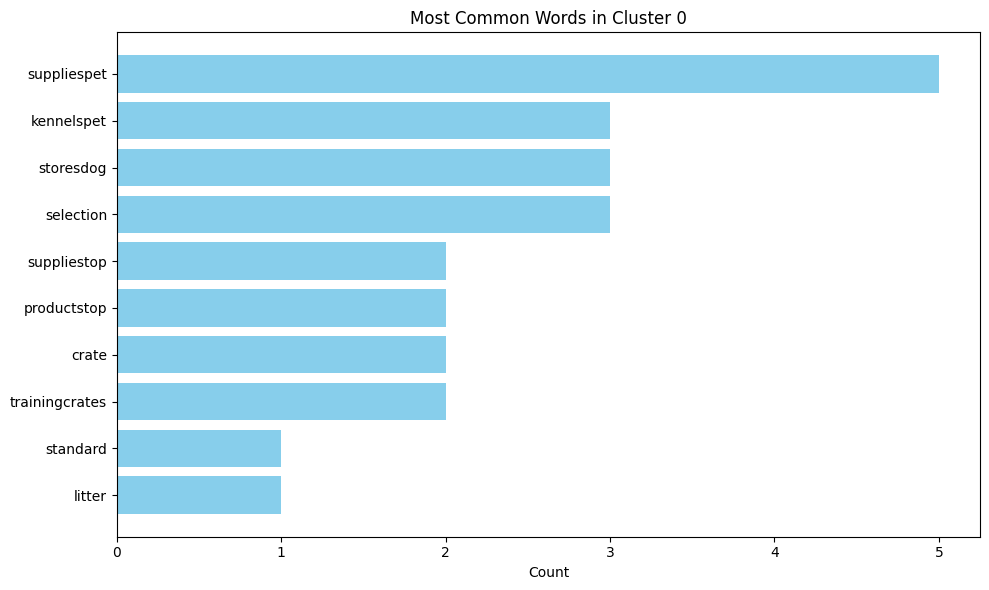

Cluster 0:
suppliespet (5)
kennelspet (3)
storesdog (3)
selection (3)
suppliestop (2)
productstop (2)
crate (2)
trainingcrates (2)
standard (1)
litter (1)
--------------------------------------------------


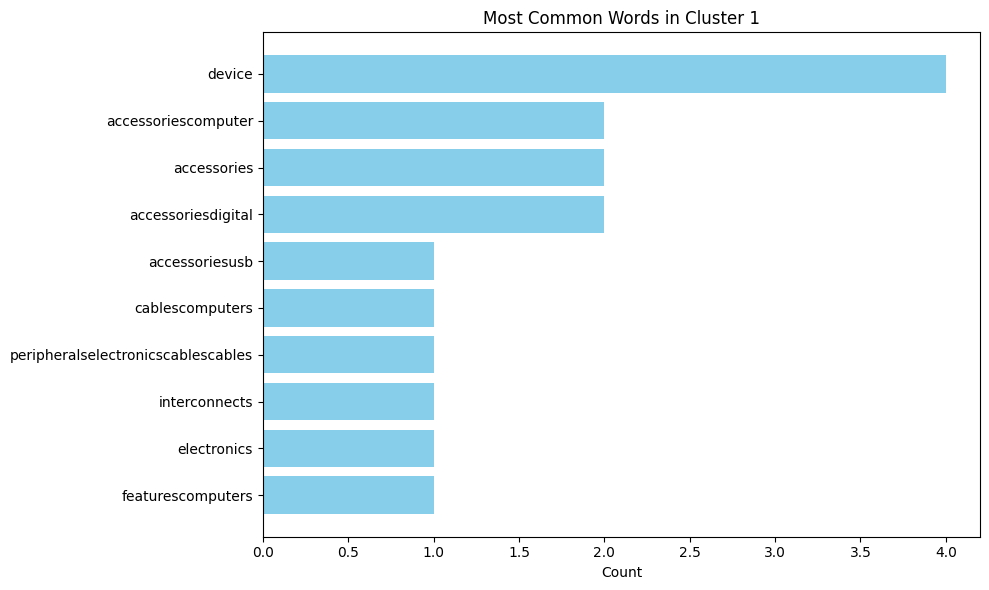

Cluster 1:
device (4)
accessoriescomputer (2)
accessories (2)
accessoriesdigital (2)
accessoriesusb (1)
cablescomputers (1)
peripheralselectronicscablescables (1)
interconnects (1)
electronics (1)
featurescomputers (1)
--------------------------------------------------


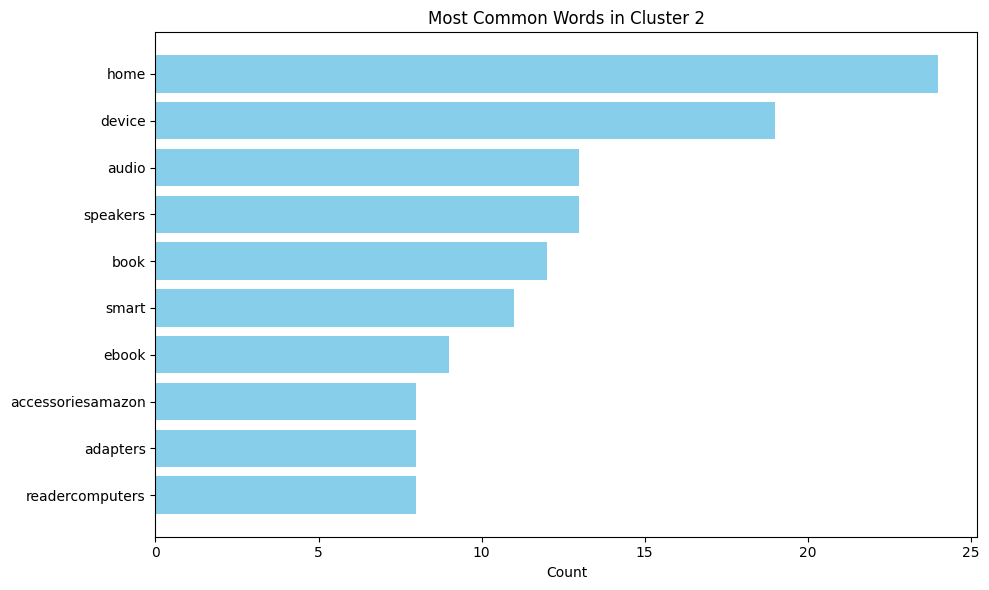

Cluster 2:
home (24)
device (19)
audio (13)
speakers (13)
book (12)
smart (11)
ebook (9)
accessoriesamazon (8)
adapters (8)
readercomputers (8)
--------------------------------------------------


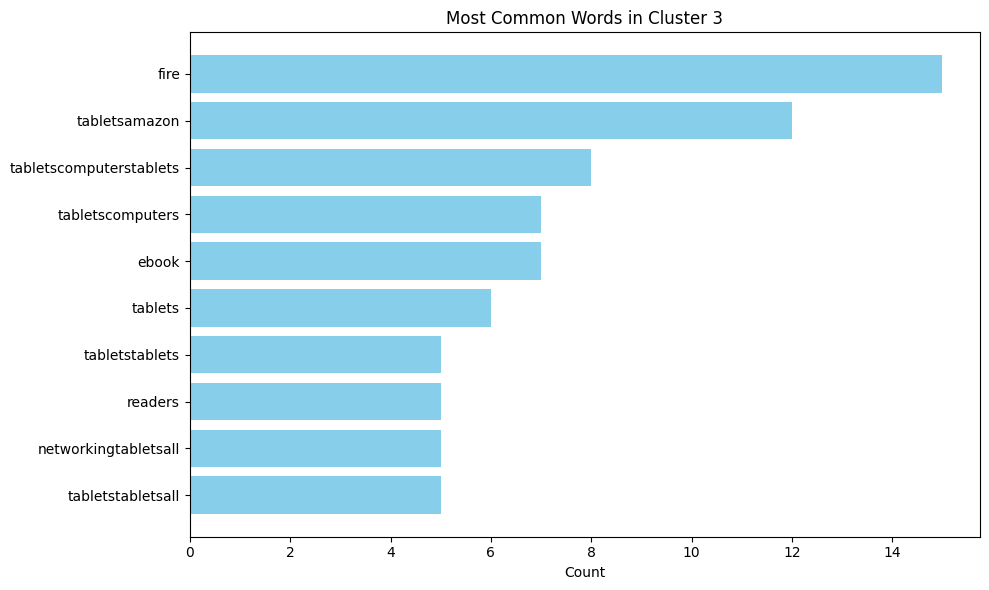

Cluster 3:
fire (15)
tabletsamazon (12)
tabletscomputerstablets (8)
tabletscomputers (7)
ebook (7)
tablets (6)
tabletstablets (5)
readers (5)
networkingtabletsall (5)
tabletstabletsall (5)
--------------------------------------------------


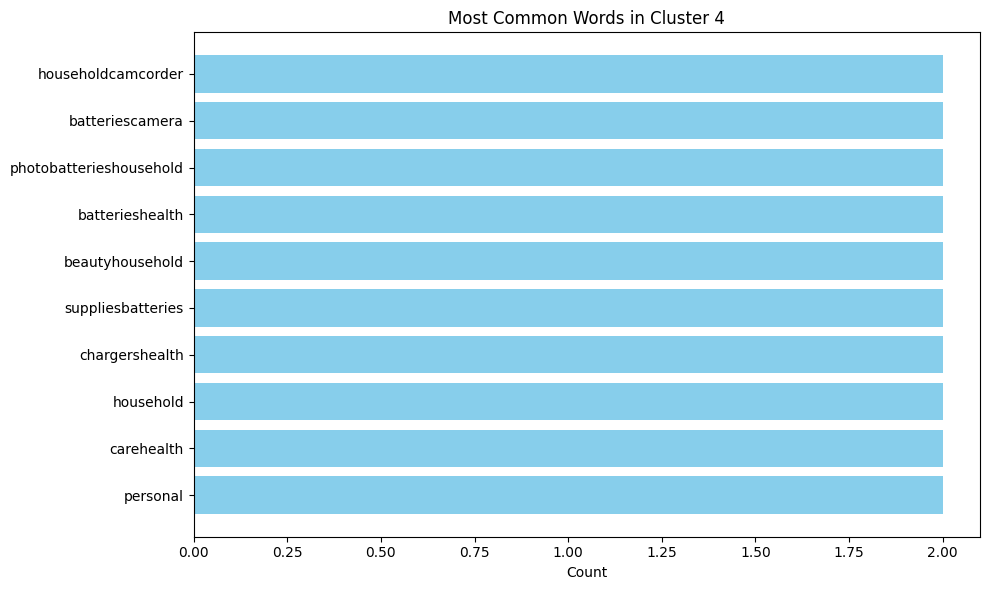

Cluster 4:
householdcamcorder (2)
batteriescamera (2)
photobatterieshousehold (2)
batterieshealth (2)
beautyhousehold (2)
suppliesbatteries (2)
chargershealth (2)
household (2)
carehealth (2)
personal (2)
--------------------------------------------------


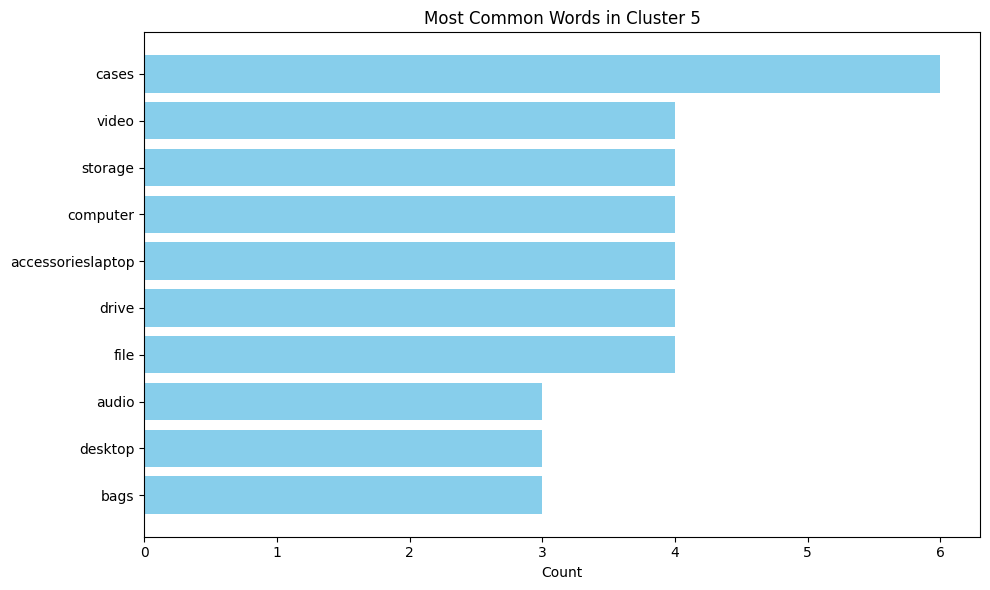

Cluster 5:
cases (6)
video (4)
storage (4)
computer (4)
accessorieslaptop (4)
drive (4)
file (4)
audio (3)
desktop (3)
bags (3)
--------------------------------------------------


In [42]:
# Loop through each cluster to plot and display its most common words
for idx, (cluster, word_count_list) in enumerate(cluster_words.items()):
    words = []
    counts = []

    # Extract words and their counts for this cluster
    for word, count in word_count_list:
        words.append(word)
        counts.append(count)

    # Plotting the results for the current cluster
    plt.figure(figsize=(10, 6))
    plt.barh(words, counts, color='skyblue')
    plt.xlabel('Count')
    plt.title(f'Most Common Words in {cluster}')
    plt.gca().invert_yaxis()  # To show the highest frequency at the top
    plt.tight_layout()
    plt.show()

    # Print results for inspection
    print(f"{cluster}:")
    for word, count in word_count_list:
        print(f"{word} ({count})")
    print("-" * 50)


## Assign names to clusters

In [11]:
# mapping of cluster numbers to meaningful names
cluster_names = {
    0: "Supplies",
    1: "Electronics",
    2: "H Electronics",
    3: "Tablets",
    4: "Batteries",
    5: "Computer Accessories"
}

## Sample test dataset with cluster mapping

In [12]:
# Create a small sample dataset and map categories to cluster names
# Sample data for testing
data = pd.DataFrame({
    'categories': [
        "Supplies",
        "Electronics",
        "H Electronics",
        "Tablets",
        "Batteries",
        "Computer Accessories"
    ]
})

category_cluster_map = {
    "Supplies": 0,
    "Electronics": 1,
    "H Electronics": 2,
    "Tablets": 3,
    "Batteries": 4,
    "Computer Accessories": 5
}

# Map cluster name to each category
cluster_name_map = {cat: cluster_names[label] for cat, label in category_cluster_map.items()}
data['cluster_name'] = data['categories'].map(cluster_name_map)

print(data)

             categories          cluster_name
0              Supplies              Supplies
1           Electronics           Electronics
2         H Electronics         H Electronics
3               Tablets               Tablets
4             Batteries             Batteries
5  Computer Accessories  Computer Accessories


## Visualize most common words by cluster

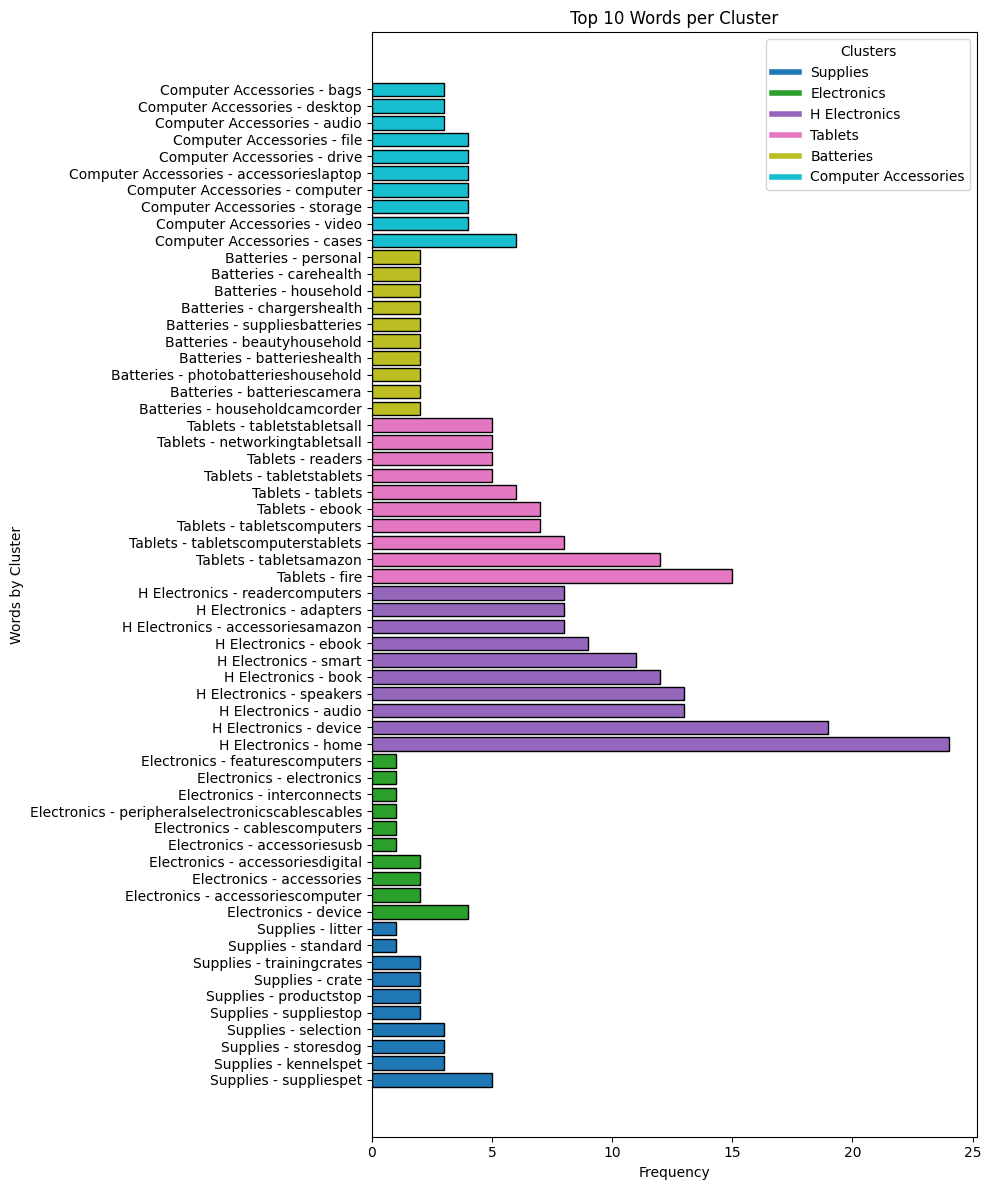

In [13]:
# Plot the top words in each cluster using a bar chart
colors = plt.cm.tab10(np.linspace(0, 1, len(cluster_words)))  # Generate distinct colors

words = []
counts = []
color_map = []
cluster_labels = []

# Prepare data for bar chart
for idx, (cluster, word_count_list) in enumerate(cluster_words.items()):
    for word, count in word_count_list:
        words.append(f"{cluster_names[idx]} - {word}")  # Label with cluster name
        counts.append(count)
        color_map.append(colors[idx])
        cluster_labels.append(cluster_names[idx])

# Create horizontal bar chart
plt.figure(figsize=(10, 12))
plt.barh(words, counts, color=color_map, edgecolor="black")

# Add legend
legend_labels = [f"{cluster_names[i]}" for i in range(len(cluster_words))]
unique_colors = [colors[i] for i in range(len(cluster_words))]
custom_legend = [plt.Line2D([0], [0], color=unique_colors[i], lw=4) for i in range(len(unique_colors))]
plt.legend(custom_legend, legend_labels, title="Clusters", loc="upper right")

plt.ylabel("Words by Cluster")
plt.xlabel("Frequency")
plt.title("Top 10 Words per Cluster")

plt.tight_layout()
plt.show()

## Load and Explore the Data

In [14]:
# Importing necessary libraries
import pandas as pd

# Load the dataset from CSV file
file_path = "/Users/aleph/Desktop/Project4/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv"
df = pd.read_csv(file_path)

# Check if the 'categories' column exists
if 'categories' not in df.columns:
    raise ValueError("Column 'categories' not found in the dataset")

# Drop any missing categories and get unique values
unique_categories = df['categories'].dropna().unique().tolist()

# Show number of unique categories
print(f"Number of unique categories: {len(unique_categories)}")

Number of unique categories: 60


##  Generate Embeddings for Categories

In [15]:
from sentence_transformers import SentenceTransformer

# Load a pre-trained sentence transformer model
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

# Generate sentence embeddings for each unique category
embeddings = model.encode(unique_categories)


## Apply KMeans Clustering

In [16]:
from sklearn.cluster import KMeans

# Apply KMeans clustering on the embeddings
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(embeddings)

# Print out labels for confirmation
print("Cluster labels assigned to categories.")

Cluster labels assigned to categories.


## Assign Custom Cluster Names

In [17]:
# Manually assign a custom name to each cluster (based on your knowledge of the categories)
custom_cluster_names = {
    0: "Supplies",
    1: "Electronics",
    2: "H Electronics",
    3: "Tablets",
    4: "Batteries",
    5: "Computer Accessories"
}

# Create a dictionary that maps each category to its cluster name
category_to_cluster = {
    category: custom_cluster_names[kmeans.labels_[i]]
    for i, category in enumerate(unique_categories)
}

## Map Cluster Names Back to Original Dataset

In [18]:
# Map the cluster name back to the original dataframe
df['Cluster_Category'] = df['categories'].map(category_to_cluster)

# Display sample output
print(df[['categories', 'Cluster_Category']].head())

                                          categories Cluster_Category
0  AA,AAA,Health,Electronics,Health & Household,C...        Batteries
1  AA,AAA,Health,Electronics,Health & Household,C...        Batteries
2  AA,AAA,Health,Electronics,Health & Household,C...        Batteries
3  AA,AAA,Health,Electronics,Health & Household,C...        Batteries
4  AA,AAA,Health,Electronics,Health & Household,C...        Batteries


##  Save the Updated Dataset

In [ ]:
output_path = "updated_categories_with_clusters.csv"
df.to_csv(output_path, index=False)

# Display a download link in Jupyter/Colab
from IPython.display import FileLink, display
print(":white_check_mark: CSV file created successfully!")
display(FileLink(output_path))